# Projeto teste 2


## Inicio: Importe de Bibliotecas, ferramentas e Drive:

In [1]:
from google.colab import drive

import math # Calculos de área e circunferencia
import numpy as np # Manipulação de matrizes
from scipy import stats

import pandas as pd # Manipulação de dados
import seaborn as sns
from sklearn.cluster import KMeans

import cv2 #OpenCV - Manipulação da Imagem
from google.colab.patches import cv2_imshow

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Parte 1: utilização do OpenCV:

### 1.1 - Separação dos canais em RGB

Fonte de Pesquisa:

*   Método copy: https://docs.python.org/3/library/copy.html
*   Método split (OpenCV):https://techtutorialsx.com/2020/03/02/python-opencv-splitting-image-channels/
*   Método hconcat (OpenCV):https://www.geeksforgeeks.org/concatenate-images-using-opencv-in-python/



Lembrando que: Ao realizar métodos do OpenCV como split, o openCV devolve os canais em ordem descrente.

(RGB -> BGR)

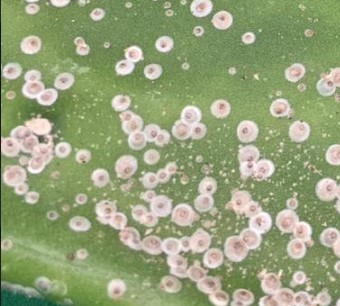

In [3]:
im = cv2.imread("/content/drive/MyDrive/Colab_Bolsa/Objetivo_Projeto.jpg")
cv2_imshow(im) 

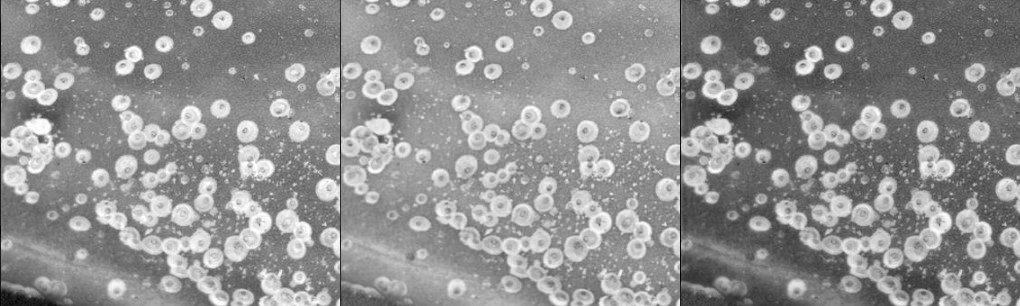

In [4]:
im_copy = im.copy() # Clona a Imagem original (Alterações no clone não afetam a imagem original);

# Teste 15 - Professor:
# Transformar em HSV
# Equalizar 
# Filtro de media

(B, G, R) = cv2.split(im) #Split = Método para a divisão da imagem nos 3 canais de intensidade
cv2_imshow(cv2.hconcat([R, G, B])) #hconcat = Concatena imagens Horizontalmente

**Concusão:**

*  Melhor canal: B - Blue

> O canal azul, entre os 3 canais de intensidade, demonstrou uma maior segmentação entre a cochonilha e a superficie da palma. Se tornando mais fácil a identificação da praga nessa confiduração.


*  Pior canal: G - Green

> No canal verde, temos uma suavização(clareamento) das cores tanto da superficie da palma como da cochonilha, provavelmente proveniente da colocaração natural da planta (que é esverdiada). Essa configuração dificulta a segmentação dos objetos.





### 1.2 - Redimensionar Imagem:

Fonte de Pesquisa: https://java2blog.com/cv2-resize-python/#:~:text=You%20can%20use%20resize%20%28%29%20method%20of%20cv2,both%20the%20height%20and%20width%20of%20an%20image.

In [5]:
def resize(im): #Função resize = Redimensiona a imagem de acordo com as dimensões relatadas(x,y)
  return cv2.resize(im, (0,0), fx=0.5, fy=0.5) 

### 1.3 - Binarização e Limiarização

Fonte da Pesquisa:

1.  threshold / Limiar da imagem: https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

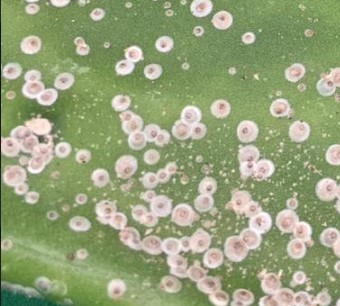

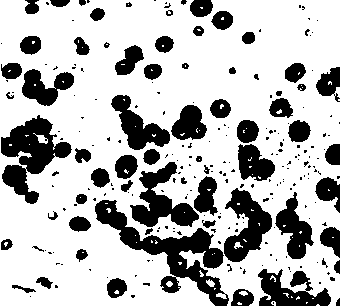

In [6]:
ret, thresh = cv2.threshold(B, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2_imshow(im)
cv2_imshow(thresh)

### 1.4 - Extração de dados da imagem a partir do Contorno:

Fonte da Pesquisa:

*   Contorno (OpenCV): https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html
*   Zeros (Numpy): https://numpy.org/doc/stable/reference/generated/numpy.zeros.html


In [7]:
def extract_image(im, cnt):
  # np.zeros: Cria uma matriz com determinadas dimensões
  im_blank = np.zeros(im.shape, np.uint8) 
  cv2.drawContours(im_blank, [cnt], -1, 255, -1)
  mask = im_blank == 255
  im_filter = im[mask]
  return im_filter

In [8]:
def try_or(im, mask, default=-1):
    try:
        return im[mask]
    except:
        return default

### 1.5 - Identificação dos Contornos:



Fontes de Pesquisa:

*  Estrutura List (cells) (Python_Básico): https://python-reference.readthedocs.io/en/latest/docs/list/
*  Método moments (OpenCV): https://docs.opencv.org/3.4/d0/d49/tutorial_moments.html

Moments significam a distribuição da matéria sobre um ponto ou um eixo. No OpenCV, os momentos são a média das intensidades dos pixels de uma imagem. Os momentos openCV são usados para descrever várias propriedades de uma imagem, como a intensidade de uma imagem, seu centroide, a área e informações sobre sua orientação.

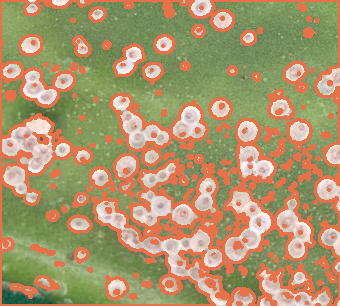

In [9]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cells = [] # Criação da lista de celulas

for cnt in contours:
  M = cv2.moments(cnt)
  x, y, width, height = cv2.boundingRect(cnt)
  rect = cv2.minAreaRect(cnt)
  circle = cv2.minEnclosingCircle(cnt)

  r = extract_image(R, cnt)
  g = extract_image(G, cnt)
  b = extract_image(B, cnt)

  cell = {
    #'area': cv2.contourArea(cnt),
    #'area_convex': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)),
    #'area_perc': (cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    #'area_convex_perc': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    #'perimeter': cv2.arcLength(cnt,True),
    #'width': width,
    #'height': height,
    #'angle': rect[2],
    #'radius': circle[1],

    'r_mean': np.mean(r) ,
    'r_max': np.max(r),
    'r_min': np.min(r),
    'r_std_dev': np.std(r),

    'g_mean': np.mean(g),
    'g_max': np.max(g),
    'g_min': np.min(g),
    'g_std_dev': np.std(g),

    'b_mean': np.mean(b),
    'b_max': np.max(b),
    'b_min': np.min(b),
    'b_std_dev': np.std(b)
  }

  cells.append(cell)

im = cv2.drawContours(im, contours, -1, (73, 113, 232), thickness=2)
cv2_imshow(im)

### 1.6 - Captura das primeiras Features (Criação do Dataframe - Pandas):

Fonte de Pesquisa:

*  Dataframe(Pandas): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [10]:
df = pd.DataFrame(cells)
df.describe()

,r_mean,r_max,r_min,r_std_dev,g_mean,g_max,g_min,g_std_dev,b_mean,b_max,b_min,b_std_dev
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,169.504400,-62.652308,-67.169231,14.666239,172.210430,-60.243077,-70.920000,13.912610,139.449910,-90.452308,68.440000,14.692437
std,13.956737,24.608271,86.584999,9.254170,18.703492,30.109358,78.518063,8.280508,14.448259,32.971673,87.217942,9.447077
min,116.400000,-124.000000,-128.000000,0.000000,118.905405,-120.000000,-128.000000,0.000000,107.800000,-124.000000,-128.000000,0.000000
25%,161.714286,-80.000000,-117.000000,7.782031,161.600000,-81.000000,-112.000000,7.814232,131.800000,-113.000000,94.000000,7.924645
50%,167.733333,-70.000000,-104.000000,13.864861,177.416667,-56.000000,-102.000000,13.474677,136.000000,-102.000000,107.000000,13.733513
75%,173.833333,-52.000000,-86.000000,20.212025,185.250000,-40.000000,-85.000000,19.554193,140.854545,-82.000000,115.000000,19.780456
max,209.420213,-1.000000,127.000000,57.430306,204.440273,-1.000000,127.000000,58.310891,192.199659,125.000000,127.000000,54.422054


In [11]:
df.shape

(325, 12)

## Parte 2: utilização do OpenCV + Kmeans:

Fonte de pesquisa base para a parte 2:

*  https://docs.opencv.org/3.4/d1/d5c/tutorial_py_kmeans_opencv.html

### 2.1 - Definicação da quantidade de Agrupamentos (Clusters):

In [12]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df) # Metodo fit

KMeans(n_clusters=4)

In [13]:
conts = [] #Lista de contornos

conts.append([])
conts.append([])
conts.append([])

for cont, cnt in enumerate(contours):
  cat = kmeans.predict([df.iloc[cont]])[0] #Método Predict
  conts[cat-1].append(cnt)

im = cv2.drawContours(im, conts[0], -1, (10, 113, 232), thickness=2)
im = cv2.drawContours(im, conts[2], -1, (82, 184, 10), thickness=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/pytho

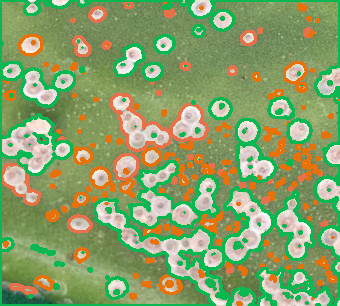

In [14]:
cv2_imshow(im)

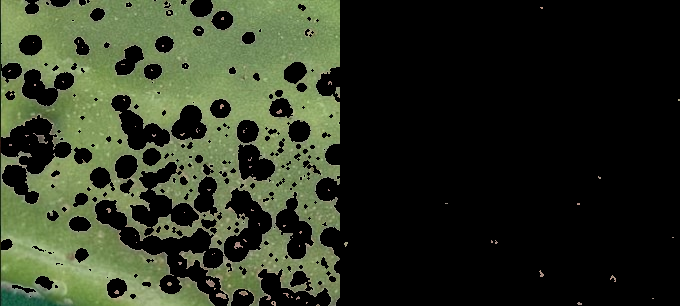

In [15]:
im_copy
t1 = cv2.drawContours(thresh.copy(), conts[0], -1, 0, thickness=cv2.FILLED)
t1 = cv2.drawContours(t1, conts[0], -1, 0, thickness=cv2.FILLED)
t1 = cv2.bitwise_and(im_copy, im_copy, t1, t1) 

t2 = cv2.drawContours(thresh.copy(), conts[0], -1, 0, thickness=cv2.FILLED)
t2 = cv2.drawContours(t2, conts[2], -1, 0, thickness=cv2.FILLED)
t2 = cv2.bitwise_and(im_copy, im_copy, t2, t2)

t3 = cv2.drawContours(thresh.copy(), conts[2], -1, 0, thickness=cv2.FILLED)
t3 = cv2.drawContours(t3, conts[2], -1, 0, thickness=cv2.FILLED)
t3 = cv2.bitwise_and(im_copy, im_copy, t3, t3)
cv2_imshow(cv2.hconcat([t1, t3]))
#cv2_imshow(t3) 

### 2.2 - Criação de Borda e Limiarização:


Fontes de pesquisa:

*  Método copyMakeBorder(OpenCV): https://www.geeksforgeeks.org/python-opencv-cv2-copymakeborder-method/#:~:text=OpenCV-Python%20is%20a%20library%20of%20Python%20bindings%20designed,cv2.copyMakeBorder%20%28src%2C%20top%2C%20bottom%2C%20left%2C%20right%2C%20borderType%2C%20value%29



In [16]:
im_gray = im
t1 = cv2.drawContours(thresh.copy(), conts[1], -1, 255, thickness=cv2.FILLED)
t1 = cv2.drawContours(t1.copy(), conts[2], -1, 255, thickness=cv2.FILLED)
t1 = cv2.bitwise_not(t1)
t1 = cv2.bitwise_and(im_gray, im_gray, t1, t1)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(im, str(conts[0]) + ' cells', (600,450), font, 3, (0, 255, 0), 2, cv2.LINE_AA)

t2 = cv2.drawContours(thresh.copy(), conts[0], -1, 255, thickness=cv2.FILLED)
t2 = cv2.drawContours(t2.copy(), conts[2], -1, 255, thickness=cv2.FILLED)
t2 = cv2.bitwise_not(t2)
t2 = cv2.bitwise_and(im_gray, im_gray, t2, t2)

t3 = cv2.drawContours(thresh.copy(), conts[0], -1, 255, thickness=cv2.FILLED)
t3 = cv2.drawContours(t3.copy(), conts[1], -1, 255, thickness=cv2.FILLED)
t3 = cv2.bitwise_not(t3)
t3 = cv2.bitwise_and(im_gray, im_gray, t3, t3)

In [17]:
# cv2.copyMakeBorder() método é usado para criar uma borda em torno da imagem como um quadro de fotos.
im_gray = cv2.copyMakeBorder(im_gray, 1,1,1,1, cv2.BORDER_CONSTANT, value=255)

# Binarização automática (OTSU)
ret, thresh = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(resize(thresh))



error: ignored

In [ ]:
#Pegando os contornos, suas características e desenhando na imagem
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


cells = []
cnts = []

cnt1 = []
cnt2 = []
for cnt in contours:
  M = cv2.moments(cnt)
  x, y, width, height = cv2.boundingRect(cnt)
  rect = cv2.minAreaRect(cnt)
  circle = cv2.minEnclosingCircle(cnt)


  im_blank = np.zeros(im_gray.shape, np.uint8)
  cv2.drawContours(im_blank, [cnt], -1, (255, 255, 255), -1)
  mask = im_blank == 255
  im_filter = im_gray[mask]

  cell = {
    'centroid': [int(M['m10']/(M['m00']+0.0000001)), int(M['m01']/(M['m00']+0.0000001))], #[x, y]
    'area': cv2.contourArea(cnt),
    'area_convex': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)),
    'area_perc': (cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    'area_convex_perc': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    'perimeter': cv2.arcLength(cnt,True),
    'boundingBox': [x, y, x+width, y+height],
    'width': width,
    'height': height,
    'angle': rect[2],
    'radius': circle[1], #Raio do menor círculo que cabe o objeto
    'mean': np.mean(im_gray[mask]),
    'max': np.max(im_gray[mask]),
    'min': np.min(im_gray[mask]),
    'std_dev': np.std(im_gray[mask]),
    'mode': stats.mode(im_gray[mask], axis = None),    
  }

  cell2 = {
    'area': cv2.contourArea(cnt),
    'area_convex': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)),
    'area_perc': (cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    'area_convex_perc': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    'perimeter': cv2.arcLength(cnt,True),
    'width': width,
    'height': height,
    'angle': rect[2],
    'radius': circle[1], #Raio do menor círculo que cabe o objeto
    'mean': np.mean(im_gray[mask]),
    'max': np.max(im_gray[mask]),
    'min': np.min(im_gray[mask]),
    'std_dev': np.std(im_gray[mask]),
  }

  if(cell['area']<20000):
    cells.append(cell2)
    cnts.append(cnt)
    
  if(cell['area']>40):
    cnt1.append(cnt)
  if(cell['area_convex_perc']>0.4):
    cnt2.append(cnt)

im_contours = cv2.drawContours(im, cnts, -1, (10, 113, 232), 1)
im_contours = cv2.drawContours(im, cnt1, -1, (82, 184, 10), 1)
im_contours = cv2.drawContours(im, cnt2, -1, (62, 62, 224), 1)

cv2_imshow(im_contours)

## Parte 3: Analise dos Resultados Alcaçados na utilização OpenCV + Kmeans

### 3.1 - Informações Organizadas em formato dataframe:

In [ ]:
df = pd.DataFrame(cells)
df

In [ ]:
df.columns

### 3.2 - Pre-Processamento do dataframe final:

In [ ]:
df = df.drop(['centroid','boundingBox','mode'], axis = 1)

In [ ]:
df.describe()

In [ ]:
df.plot(kind = 'box') 

## Parte 4: Nova Aplicação do KMeans

In [ ]:
kmeans = KMeans(n_clusters=3)

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

In [ ]:
list(cells[0].values())

In [ ]:
conts = []

conts.append([])
conts.append([])
conts.append([])

for cont, cnt in enumerate(cnts):
  cat = kmeans.predict([df.iloc[cont]])[0]
  conts[cat-1].append(cnt)

im = cv2.imread("cell.png")
im = cv2.cvtColor(im_gray, cv2.COLOR_GRAY2BGR)
#thresh = cv2.drawContours(thresh, conts[0], -1, 255, thickness=cv2.FILLED)
#thresh = cv2.drawContours(thresh, conts[1], -1, 255, thickness=cv2.FILLED)

#im = cv2.drawContours(im, conts[0], -1, (10, 113, 232), 1)
#im = cv2.drawContours(im, conts[1], -1, (82, 184, 10), 1)
#im = cv2.drawContours(im, conts[2], -1, (62, 62, 224), 1)

im = cv2.drawContours(im, conts[0], -1, (10, 113, 232), thickness=cv2.FILLED)
im = cv2.drawContours(im, conts[1], -1, (82, 184, 10), thickness=cv2.FILLED)
im = cv2.drawContours(im, conts[2], -1, (62, 62, 224), thickness=cv2.FILLED)


In [ ]:
im_gray = im
t1 = cv2.drawContours(thresh.copy(), conts[1], -1, 255, thickness=cv2.FILLED)
t1 = cv2.drawContours(t1.copy(), conts[2], -1, 255, thickness=cv2.FILLED)
t1 = cv2.bitwise_not(t1)
t1 = cv2.bitwise_and(im_gray, im_gray, t1, t1)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(im, str(conts[0]) + ' cells', (600,450), font, 3, (0, 255, 0), 2, cv2.LINE_AA)

t2 = cv2.drawContours(thresh.copy(), conts[0], -1, 255, thickness=cv2.FILLED)
t2 = cv2.drawContours(t2.copy(), conts[2], -1, 255, thickness=cv2.FILLED)
t2 = cv2.bitwise_not(t2)
t2 = cv2.bitwise_and(im_gray, im_gray, t2, t2)

t3 = cv2.drawContours(thresh.copy(), conts[0], -1, 255, thickness=cv2.FILLED)
t3 = cv2.drawContours(t3.copy(), conts[1], -1, 255, thickness=cv2.FILLED)
t3 = cv2.bitwise_not(t3)
t3 = cv2.bitwise_and(im_gray, im_gray, t3, t3)

In [ ]:
t1.shape

### 4.1 - Apresentação dos Resultados:

In [ ]:
cv2_imshow(cv2.hconcat([t1, t2, t3]))

In [ ]:
cv2_imshow(im)

In [ ]:
cv2_imshow(im)

In [ ]:
cv2_imshow(thresh)

In [ ]:
cv2_imshow(im)